In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV

import xgboost

import warnings
warnings.filterwarnings("ignore") 

In [442]:
df = pd.read_csv('../input/crop-recommendation-dataset/Crop_recommendation.csv')

In [443]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [444]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

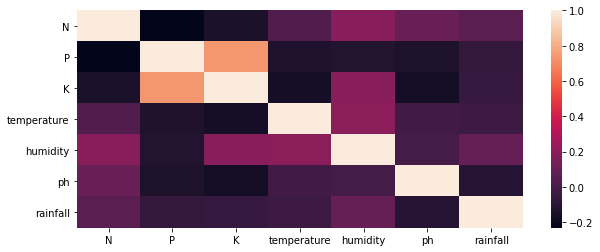

In [445]:
corr = df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<AxesSubplot:xlabel='N', ylabel='Density'>

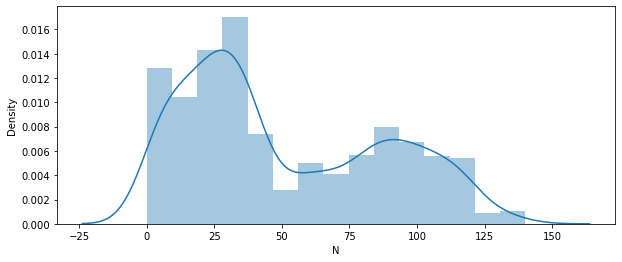

In [446]:
sns.distplot(df['N'])

<AxesSubplot:xlabel='P', ylabel='Density'>

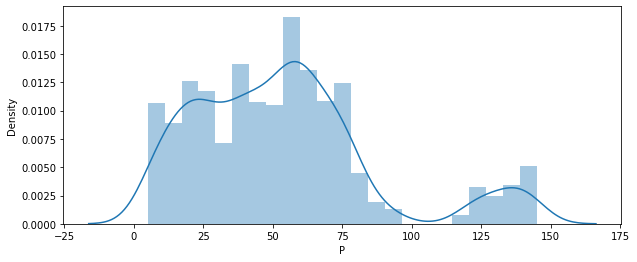

In [447]:
sns.distplot(df['P'])

<AxesSubplot:xlabel='K', ylabel='Density'>

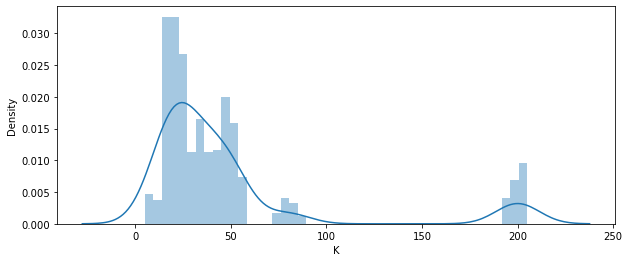

In [448]:
sns.distplot(df['K'])

<AxesSubplot:xlabel='temperature', ylabel='Density'>

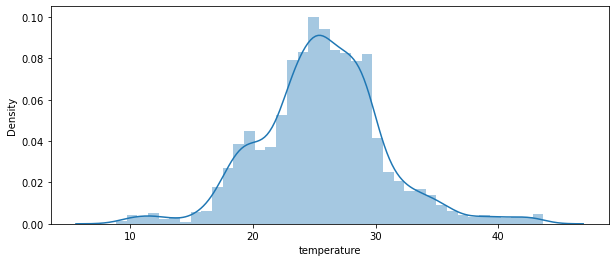

In [449]:
sns.distplot(df['temperature'])

<AxesSubplot:xlabel='ph', ylabel='Density'>

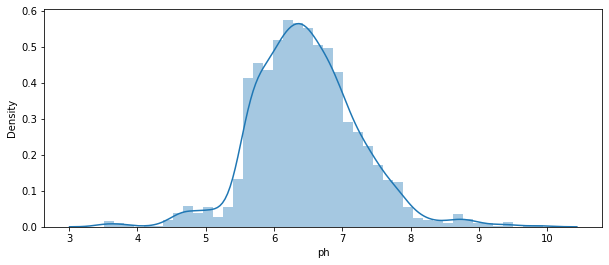

In [450]:
sns.distplot(df['ph'])

<AxesSubplot:xlabel='rainfall', ylabel='Density'>

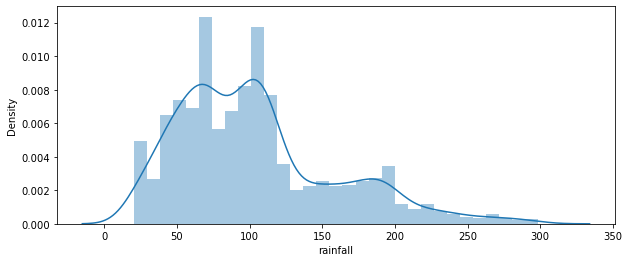

In [451]:
sns.distplot(df['rainfall'])

<AxesSubplot:xlabel='humidity', ylabel='Density'>

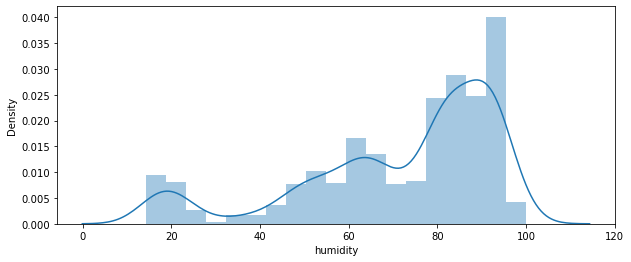

In [452]:
sns.distplot(df['humidity'])

<function matplotlib.pyplot.show(close=None, block=None)>

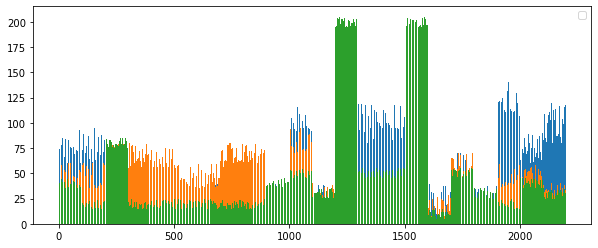

In [453]:
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(df['N'].index, df['N'])
ax.bar(df['P'].index, df['P'])
ax.bar(df['K'].index, df['K'])

plt.legend()

plt.show

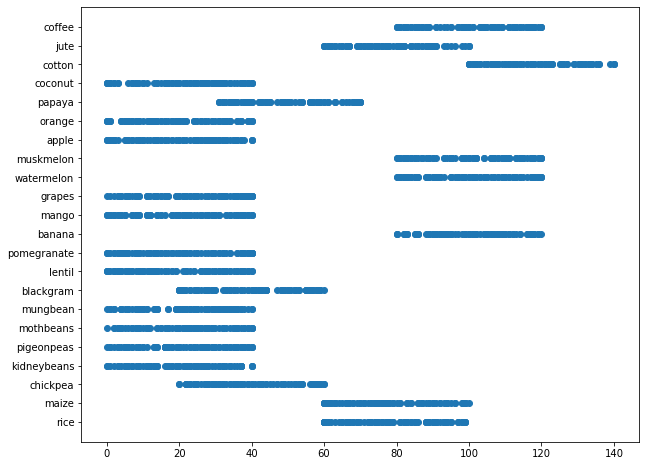

In [454]:
plt.figure(figsize=(10,8))
plt.scatter(x=df['N'], y=df['label'])

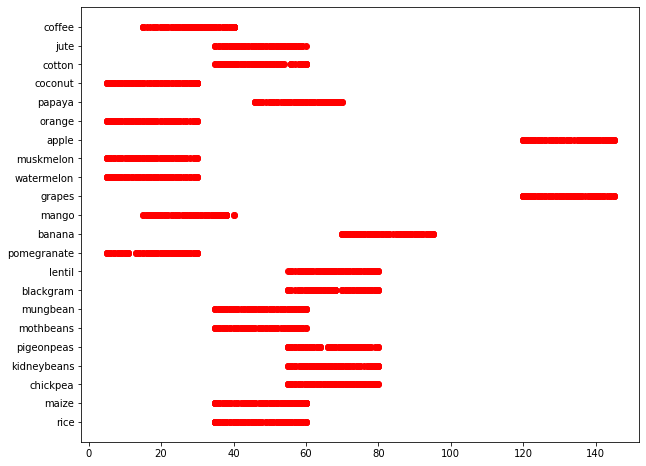

In [455]:
plt.figure(figsize=(10,8))
plt.scatter(x=df['P'], y=df['label'], c='red')

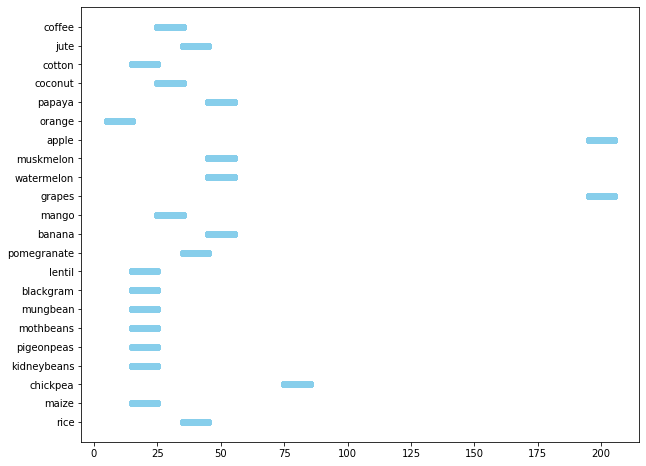

In [456]:
plt.figure(figsize=(10,8))
plt.scatter(x=df['K'], y=df['label'], c='skyblue')

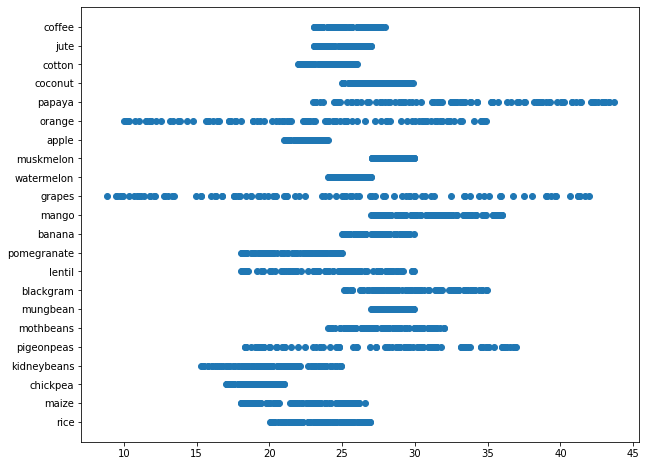

In [457]:
plt.figure(figsize=(10,8))
plt.scatter(x=df['temperature'], y=df['label'])

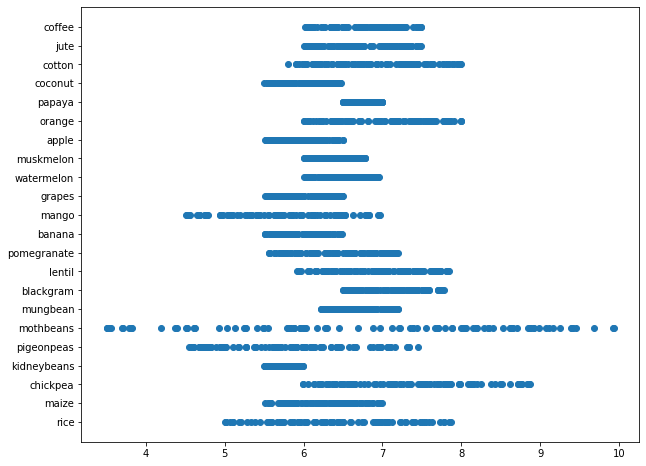

In [458]:
plt.figure(figsize=(10,8))
plt.scatter(x=df['ph'], y=df['label'])

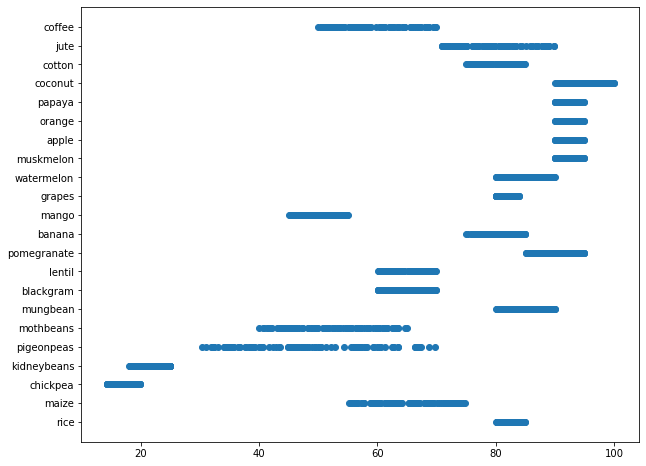

In [459]:
plt.figure(figsize=(10,8))
plt.scatter(x=df['humidity'], y=df['label'])

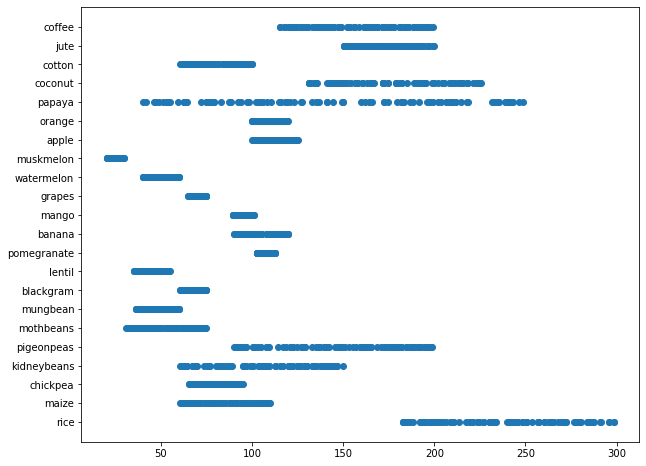

In [460]:
plt.figure(figsize=(10,8))
plt.scatter(x=df['rainfall'], y=df['label'])

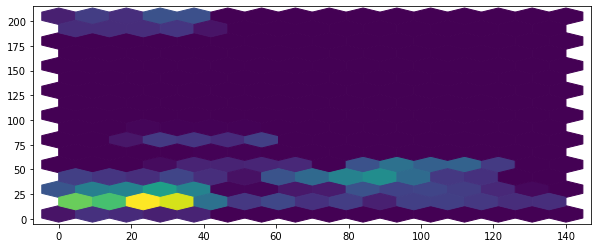

In [461]:
plt.hexbin(x=df['N'], y=df['K'], gridsize=15)

<AxesSubplot:>

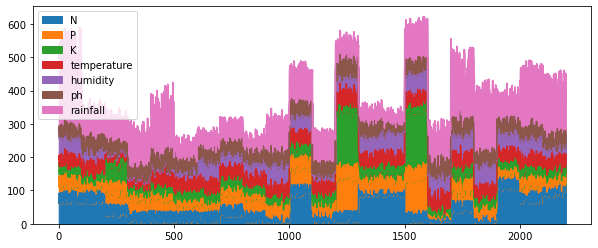

In [462]:
df.plot.area()

Text(0, 0.5, '')

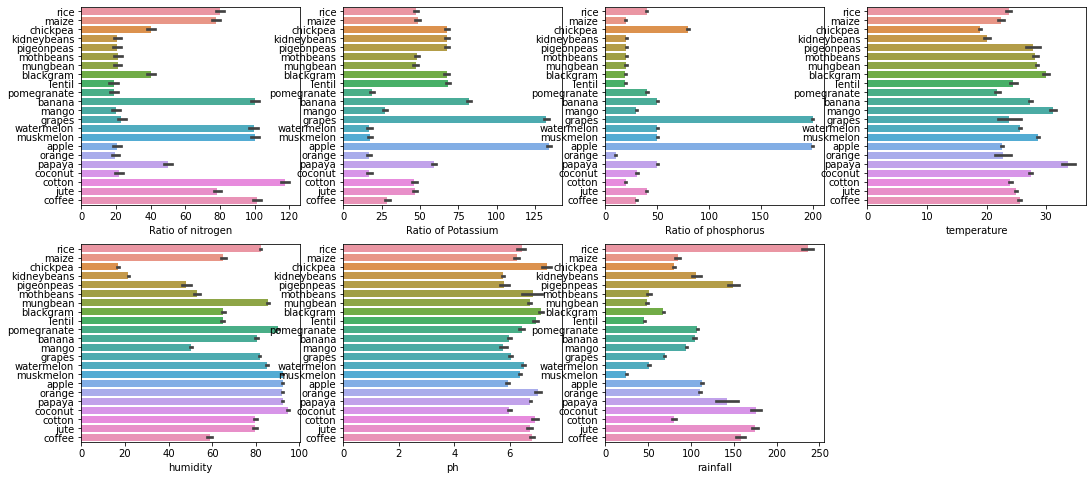

In [463]:
plt.rcParams['figure.figsize'] = (18, 8)
plt.tight_layout(pad=5.0)


plt.subplot(2,4,1)
sns.barplot(x=df['N'], y=df['label'], data=df)
plt.xlabel('Ratio of nitrogen', fontsize=10)
plt.ylabel('', fontsize=8)

plt.subplot(2,4,2)
sns.barplot(x=df['P'], y=df['label'])
plt.xlabel('Ratio of Potassium', fontsize=10)
plt.ylabel('', fontsize=8)

plt.subplot(2,4,3)
sns.barplot(x=df['K'], y=df['label'])
plt.xlabel('Ratio of phosphorus', fontsize=10)
plt.ylabel('', fontsize=8)

plt.subplot(2,4,4)
sns.barplot(x=df['temperature'], y=df['label'])
plt.xlabel('temperature', fontsize=10)
plt.ylabel('', fontsize=8)

plt.subplot(2,4,5)
sns.barplot(x=df['humidity'], y=df['label'])
plt.xlabel('humidity', fontsize=10)
plt.ylabel('', fontsize=8)

plt.subplot(2,4,6)
sns.barplot(x=df['ph'], y=df['label'])
plt.xlabel('ph', fontsize=10)
plt.ylabel('', fontsize=8)

plt.subplot(2,4,7)
sns.barplot(x=df['rainfall'], y=df['label'])
plt.xlabel('rainfall', fontsize=10)
plt.ylabel('', fontsize=8)

In [464]:
X = df.drop(['label'], axis=1)
y = df['label']

In [465]:
X.shape

(2200, 7)

In [466]:
y.shape

(2200,)

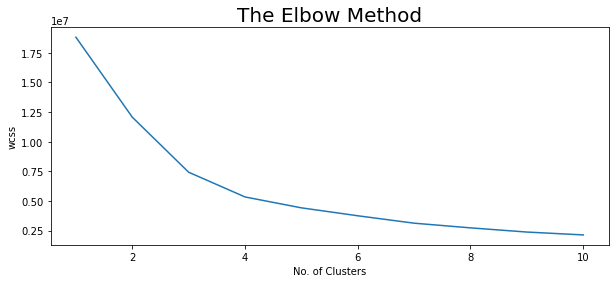

In [467]:
# lets determine the Optimum Number of Clusters within the Dataset

from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)

# lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [468]:
# lets implement the K Means algorithm to perform Clustering analysis
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X)

# lets find out the Results
a = df['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# lets check the Clusters of each Crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Forth Cluster:", z[z['cluster'] == 3]['label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------
Crops in Second Cluster: ['grapes' 'apple']
---------------------------------------------------------------
Crops in Third Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
---------------------------------------------------------------
Crops in Forth Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']


In [469]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

In [470]:
print("X_train", X_train.shape)
print("y_test", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1650, 7)
y_test (1650,)
X_test (550, 7)
y_test (550,)


# Logistic Regression

In [471]:
logireg = LogisticRegression(solver='lbfgs')

In [472]:
logireg.fit(X_train, y_train)

LogisticRegression()

In [473]:
y_pred=logireg.predict(X_test)

In [474]:
confusion_matrix(y_test, y_pred)

array([[24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 27,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31,  0,  0,

In [475]:
accuracy_score(y_test, y_pred)

0.9618181818181818

In [476]:
cr = classification_report(y_test, y_pred)

In [477]:
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        25
   blackgram       0.88      0.96      0.92        23
    chickpea       1.00      1.00      1.00        24
     coconut       1.00      1.00      1.00        27
      coffee       0.96      1.00      0.98        27
      cotton       0.87      0.96      0.92        28
      grapes       1.00      1.00      1.00        25
        jute       0.79      0.96      0.86        23
 kidneybeans       1.00      1.00      1.00        31
      lentil       0.96      0.96      0.96        28
       maize       0.96      0.82      0.88        28
       mango       1.00      1.00      1.00        26
   mothbeans       0.95      0.88      0.91        24
    mungbean       1.00      0.96      0.98        27
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [478]:
logistic_cv = cross_val_score(logireg, X_train, y_train, cv=10, scoring="accuracy").mean()

In [479]:
logistic_cv

0.9515151515151514

In [480]:
logistic_f1 = f1_score(y_test, y_pred, average='weighted')

### Let's do the same model with cross validation 

In [481]:
from sklearn.pipeline import make_pipeline

In [482]:
pipe = make_pipeline(logireg)

In [483]:
logistic_cv = cross_val_score(pipe, X_train, y_train, cv=10, scoring="accuracy").mean()

In [484]:
logistic_cv

0.9515151515151514

In [485]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('logisticregression', LogisticRegression())])

In [486]:
X_new = X_test.sample(5, random_state=8)

In [487]:
X_new

,N,P,K,temperature,humidity,ph,rainfall
498,10,71,18,19.542849,66.347773,6.151029,173.110698
1859,37,10,32,28.963183,95.163337,6.165085,222.803013
655,25,40,21,27.733291,81.139030,6.248901,44.175809
2046,60,55,36,26.127972,80.491726,7.132389,150.632687
1514,0,133,200,23.672877,90.493557,5.708419,104.229803


In [488]:
pipe.predict(X_new)

array(['pigeonpeas', 'coconut', 'mungbean', 'jute', 'apple'], dtype=object)

In [489]:
y_pred = pipe.predict(X_test)

In [490]:
logistic_accuracy = accuracy_score(y_pred, y_test)

In [491]:
logistic_accuracy

0.9618181818181818

# Let's try with the decision tree classifier

In [492]:
dt_clf = DecisionTreeClassifier()

In [493]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [494]:
y_pred = dt_clf.predict(X_test)

In [495]:
decisiontree_accuracy = accuracy_score(y_pred, y_test)

In [496]:
decisiontree_accuracy

0.9818181818181818

In [497]:
decisiontree_cv = cross_val_score(dt_clf, X_train, y_train, cv=10, scoring='accuracy').mean()

In [498]:
decisiontree_cv

0.9860606060606061

In [499]:
decisiontree_f1 = f1_score(y_test, y_pred, average='weighted')

In [500]:
decisiontree_f1

0.9817338418600161

In [ ]:
dt_clf.feature_importances_

# Let's try with random forest classifier

In [501]:
rf_clf = RandomForestClassifier(n_estimators=500)

In [502]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [503]:
y_pred = rf_clf.predict(X_test)

In [504]:
randomforest_accuracy = accuracy_score(y_test, y_pred)

In [505]:
randomforest_accuracy

0.9927272727272727

In [506]:
randomforest_cv = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring="accuracy").mean()

In [507]:
randomforest_cv

0.9969696969696971

In [508]:
randomforest_f1 = f1_score(y_test, y_pred, average='macro')

In [509]:
randomforest_f1

0.9920086927505739

In [510]:
n_estimators = [100, 300, 500, 800]
max_depth = [5, 8, 15, 20]
min_samples_split = [2, 5, 10, 15, 30]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf_clf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


In [511]:
y_pred = bestF.predict(X_test)

In [512]:
accuracy_score(y_test, y_pred)

0.9927272727272727

# Now we just build model with excluding temperature and ph 

In [513]:
rf_clf.feature_importances_

array([0.10745543, 0.14632642, 0.18123759, 0.07453166, 0.21084926,
       0.05420178, 0.22539788])

In [514]:
rf_fs_clf = RandomForestClassifier(n_estimators=500)

In [515]:
rf_train = X_train.drop(['temperature','ph'], axis=1)

In [516]:
rf_test = X_test.drop(['temperature','ph'], axis=1)

In [517]:
rf_fs_clf.fit(rf_train, y_train)

RandomForestClassifier(n_estimators=500)

In [518]:
y_pred = rf_fs_clf.predict(rf_test)

In [519]:
rf_fs_accuracy = accuracy_score(y_test, y_pred)

In [520]:
rf_fs_accuracy

0.990909090909091

In [521]:
rf_fs_cv = cross_val_score(rf_fs_clf, rf_train, y_train, cv=10, scoring="accuracy").mean()

In [522]:
rf_fs_cv

0.990909090909091

In [524]:
rf_fs_clf_f1 = f1_score(y_test, y_pred, average='macro')

In [525]:
rf_fs_clf_f1

0.9897488494193021

# Now time for xgboost classifier

In [526]:
xgb_clf = xgboost.XGBClassifier(learning_rate=0.03)

In [527]:
xgb_clf.fit(X_train, y_train)

[09:36:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [528]:
xgb_clf.feature_importances_

array([0.15084429, 0.17304255, 0.19625697, 0.11106276, 0.13537836,
       0.05319228, 0.18022278], dtype=float32)

In [529]:
y_pred = xgb_clf.predict(X_test)

In [530]:
xgb_accuracy = accuracy_score(y_test, y_pred)

In [531]:
xgb_accuracy

0.9890909090909091

In [532]:
xgb_cv = cross_val_score(xgb_clf, X_train, y_train, cv=10, scoring='accuracy').mean()

[09:36:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:36:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:36:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:36:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [533]:
xgb_cv

0.9921212121212122

In [534]:
xgb_f1 = f1_score(y_test, y_pred, average='macro')

In [535]:
xgb_f1

0.9888664399554656

# Let's give a shot to knn

In [536]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [537]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [538]:
knn_accuracy = accuracy_score(y_test, y_pred)

In [539]:
knn_accuracy

0.9890909090909091

In [540]:
knn_cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy").mean()

In [541]:
knn_cv

0.9799999999999999

In [542]:
knn_f1 = f1_score(y_test, y_pred, average='macro')

In [543]:
knn_f1

0.9888664399554656

In [544]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

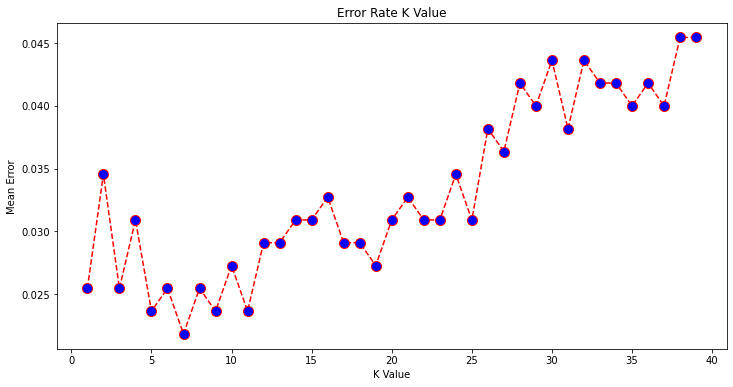

In [545]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# SVC (Support Vector Classifier)

In [546]:
svm_clf = svm.SVC(kernel='poly')

In [547]:
svm_clf.fit(X_train, y_train)

SVC(kernel='poly')

In [548]:
y_pred = svm_clf.predict(X_test)

In [549]:
svm_accuracy = accuracy_score(y_test, y_pred)

In [550]:
svm_accuracy

0.9763636363636363

In [551]:
svm_cv = cross_val_score(svm_clf, X_train, y_train, cv=10, scoring='accuracy').mean()

In [552]:
svm_cv

0.9842424242424241

In [553]:
svm_f1 = f1_score(y_test, y_pred, average='macro')

# CONCLUSION 

In [557]:
titles = ['Logistic Regression', 'Decision Tree', 'Random Forest','Random Forest with Feature selection', 'XGBoost Classifier', 'KNN', 'SVM Classifier']
df1 = pd.DataFrame(titles, columns=['Algorithm'], index=None)

df1['Accuracy'] = [logistic_accuracy, decisiontree_accuracy, randomforest_accuracy, rf_fs_accuracy, xgb_accuracy, knn_accuracy, svm_accuracy]
df1['Cv_score(cv=10)'] = [logistic_cv, decisiontree_cv, randomforest_cv, rf_fs_cv, xgb_cv, knn_cv, svm_cv]
df1['F1_score'] = [logistic_f1, decisiontree_f1, randomforest_f1, rf_fs_clf_f1, xgb_f1, knn_f1, svm_f1]

In [561]:
df1

,Algorithm,Accuracy,Cv_score(cv=10),F1_score
0,Logistic Regression,0.961818,0.951515,0.961371
1,Decision Tree,0.981818,0.986061,0.981734
2,Random Forest,0.992727,0.996970,0.992009
3,Random Forest with Feature selection,0.990909,0.990909,0.989749
4,XGBoost Classifier,0.989091,0.992121,0.988866
5,KNN,0.989091,0.980000,0.988866
6,SVM Classifier,0.976364,0.984242,0.975394
